#Predicting housing prices using California Housing Prices (1990)

Dataset from: https://www.kaggle.com/camnugent/california-housing-prices

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Data Preparation

In [116]:
df = pd.read_csv('archive\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [117]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [118]:
#Filling null values in total_bedrooms with the median value
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace = True)

In [119]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [120]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
#Splitting data into train and test data
dfcopy = df.copy()
labels = dfcopy.pop('median_house_value')
x_train, x_test, y_train, y_test = train_test_split(dfcopy, labels, test_size=0.25, random_state=88)

#Simple Linear Regresssion

In [123]:
#Using ordinal encoding for the categorical feature of ocean_proximity
import sklearn
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x_train[['ocean_proximity']] = oe.fit_transform(x_train[['ocean_proximity']])
x_test[['ocean_proximity']] = oe.fit_transform(x_test[['ocean_proximity']])
df[['ocean_proximity']] = oe.fit_transform(df[['ocean_proximity']])

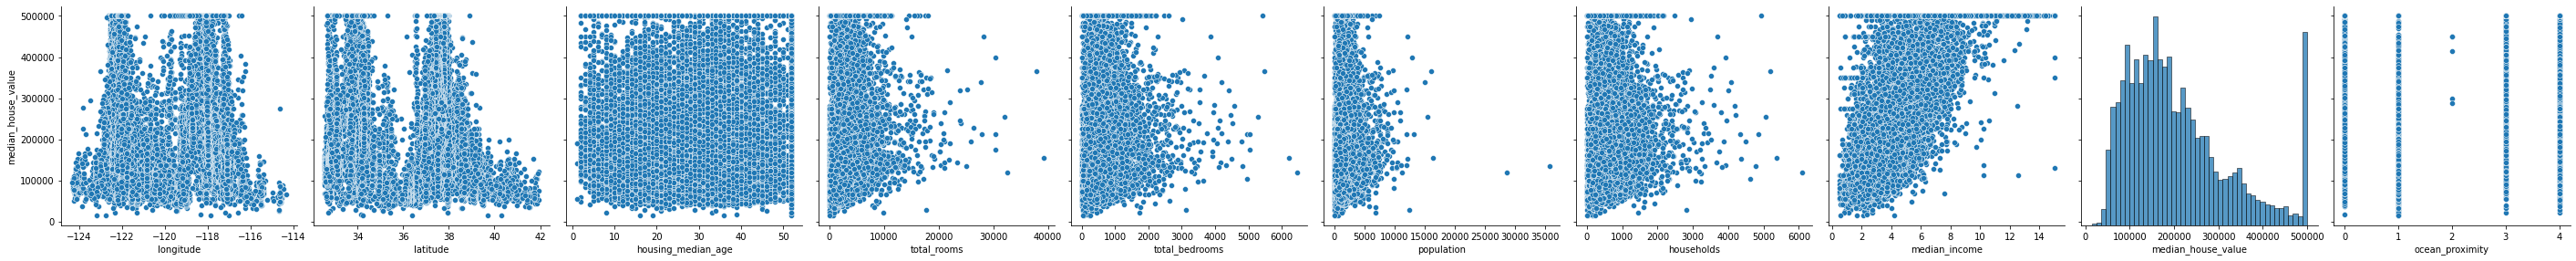

In [124]:
sb.pairplot(df,x_vars=df.columns,y_vars='median_house_value',height=4)

<AxesSubplot:>

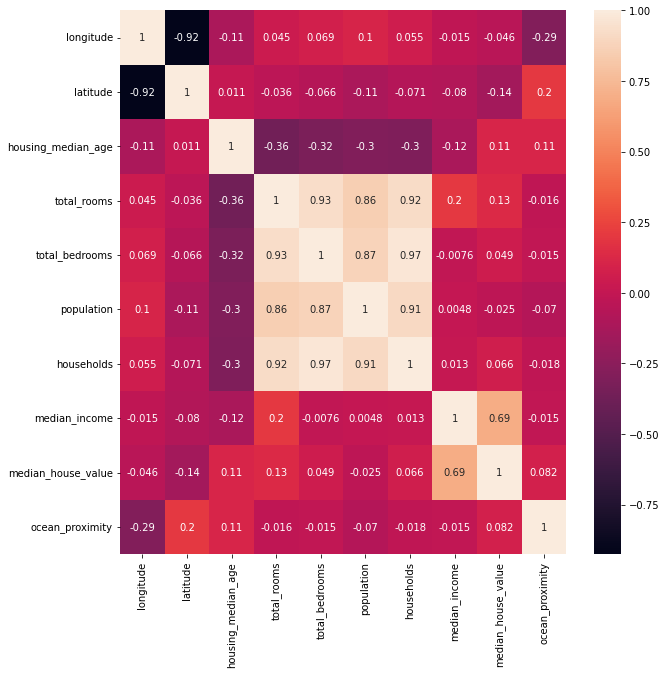

In [125]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)

From pairplot and heatmap, all independent variables except median_income have a weak linear relationship with median_house_value. Hence, a linear regression model would not be an optimal model.

In [126]:
from sklearn.linear_model import LinearRegression
#Linear regression with all the features
lm = LinearRegression().fit(x_train,y_train)
#R-squared value of model on train data
lm.score(x_train,y_train)

0.6396424977490676

r-squared value: 0.6230404445060108


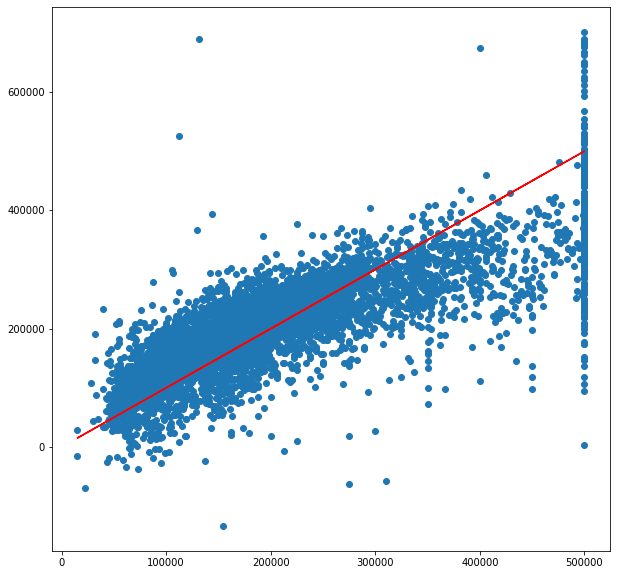

In [127]:
#Using model to predict prices of test data
pred = lm.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='red')
print("r-squared value:",sklearn.metrics.r2_score(y_test,pred))

In [128]:
#Linear regression with the 4 independent variables with magnitude of correlation with median_house_value >0.1
lm1 = LinearRegression().fit(x_train[['latitude','housing_median_age','total_rooms','median_income']],y_train)
lm1.score(x_train[['latitude','housing_median_age','total_rooms','median_income']],y_train)

0.5270040323715797

r-squared value: 0.5050093180129148


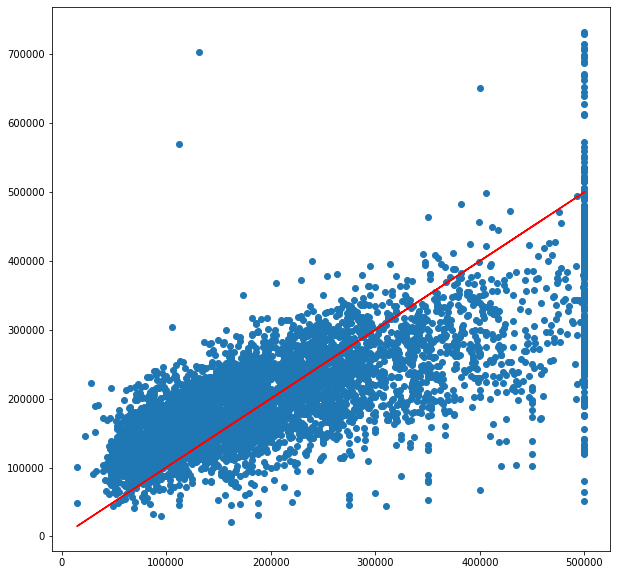

In [129]:
pred1 = lm1.predict(x_test[['latitude','housing_median_age','total_rooms','median_income']])
plt.figure(figsize=(10,10))
plt.scatter(y_test,pred1)
plt.plot(y_test,y_test,color='red')
print("r-squared value:",sklearn.metrics.r2_score(y_test,pred1))

#Decision Tree Regression

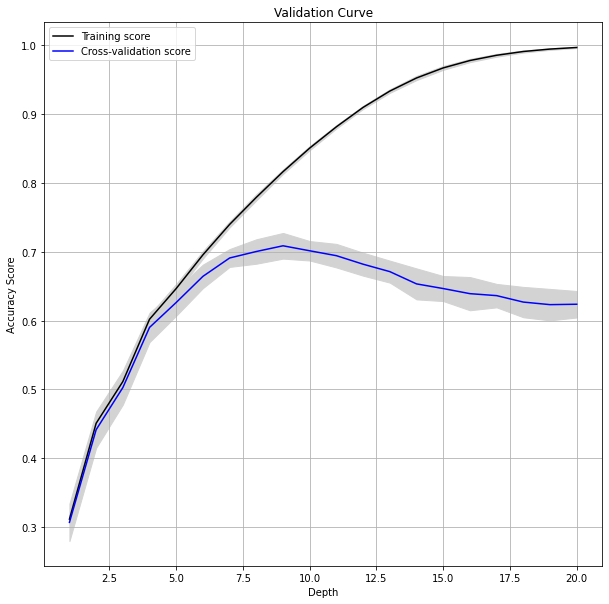

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import validation_curve
#Finding optimal depth
param_range = range(0,21)
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), x_train, y_train, param_name="max_depth", param_range=param_range)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,10))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="lightgray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="lightgray")
plt.title("Validation Curve")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Optimal depth with least underfitting and overfitting is 9.

In [131]:
dtr = DecisionTreeRegressor(random_state=0,max_depth=9)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=0)

r-squared value: 0.719022355004263


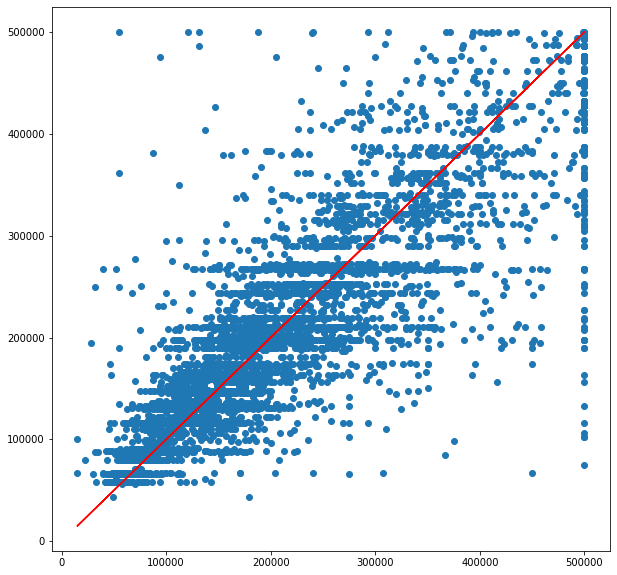

In [132]:
pred_dtr = dtr.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test,pred_dtr)
plt.plot(y_test,y_test,color='red')
print("r-squared value:",sklearn.metrics.r2_score(y_test,pred_dtr))

[Text(0.5399799485472155, 0.95, 'median_income <= 5.043\nsquared_error = 13287379693.925\nsamples = 15480\nvalue = 207016.164'),
 Text(0.27888544188861986, 0.85, 'median_income <= 3.106\nsquared_error = 8315111387.736\nsamples = 12171\nvalue = 173471.839'),
 Text(0.14009533898305085, 0.75, 'ocean_proximity <= 0.5\nsquared_error = 5605069637.386\nsamples = 6032\nvalue = 136557.333'),
 Text(0.0746822033898305, 0.65, 'longitude <= -118.295\nsquared_error = 5323106063.577\nsamples = 2120\nvalue = 172160.998'),
 Text(0.0387409200968523, 0.55, 'latitude <= 34.695\nsquared_error = 7776827752.142\nsamples = 861\nvalue = 199744.729'),
 Text(0.01937046004842615, 0.45, 'longitude <= -118.355\nsquared_error = 8716685906.221\nsamples = 563\nvalue = 221354.195'),
 Text(0.009685230024213076, 0.35, 'latitude <= 34.165\nsquared_error = 8562050602.829\nsamples = 294\nvalue = 248060.575'),
 Text(0.004842615012106538, 0.25, 'longitude <= -118.375\nsquared_error = 10041432952.124\nsamples = 125\nvalue = 30

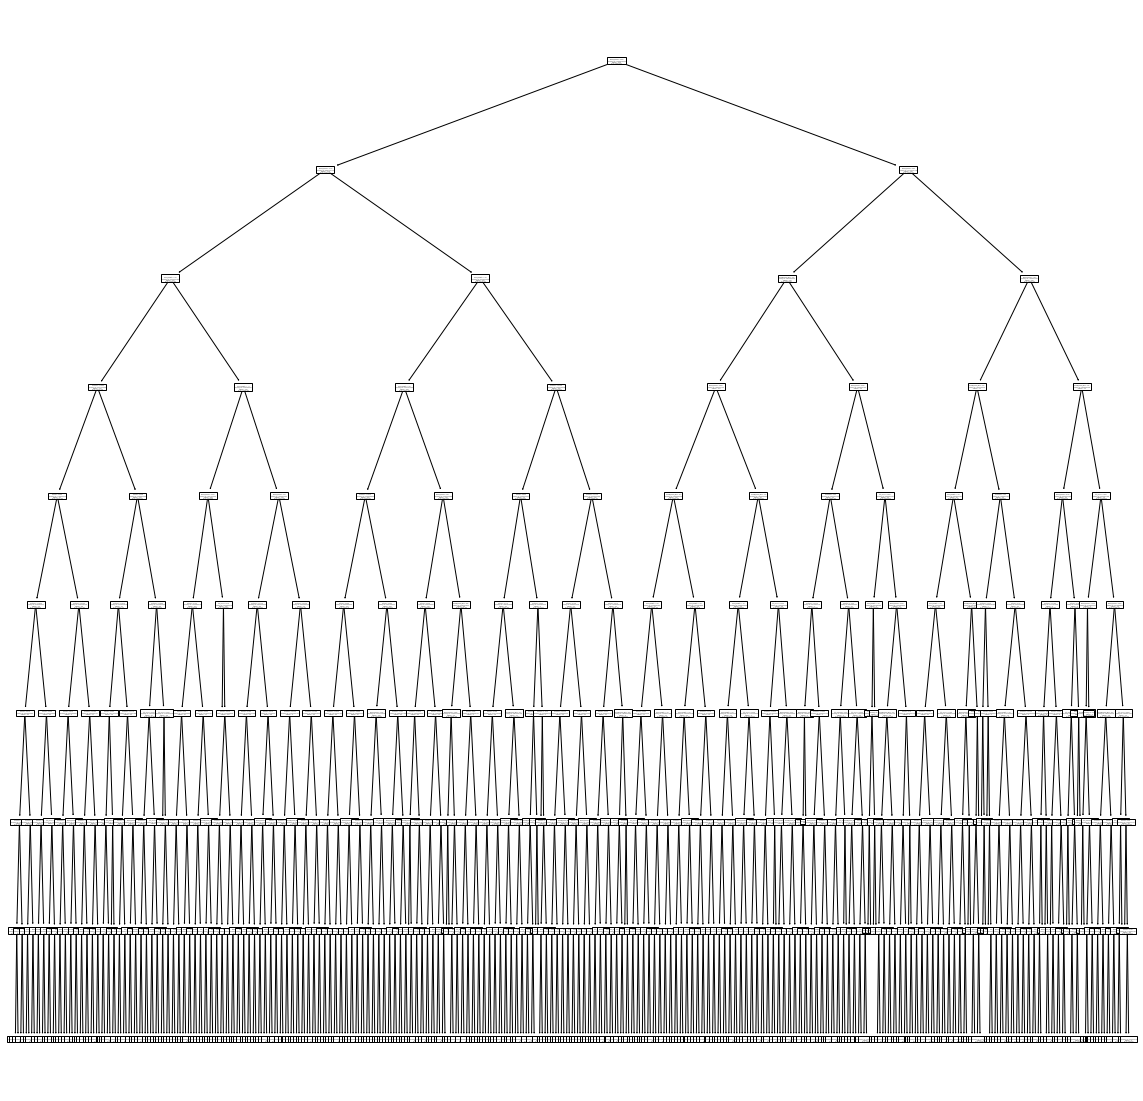

In [133]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dtr,feature_names=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity'])